# Исследование надежности заемщиков.

# Описание проекта
Заказчик — кредитный отдел банка. 
Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Обзор данных

In [1]:
import pandas as pd
import seaborn
data = pd.read_csv('/datasets/data.csv')
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 12 столбцов. Тип данных в столбцах — `object`, `float64`, `int`

Согласно документации к данным:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

В названиях колонок нет нарушения стиля, поэтому оставим без изменения. 

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, чтобы двигаться дальше, нужно устранить проблемы в данных.

Замечу, что в колонке трудового стажа встречаются отрицательные значения. 


### Шаг 2.1 Заполнение пропусков

Сначала посчитаем, сколько в таблице пропущенных значений:

In [3]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски только в двух колонках: трудовой стаж и ежемесячный доход. И число пропусков одинаково. Можно логично предположить, что отсутсвие стажа влечет за собой отсутствие дохода. Нет работы - нет денег. Но мы не можем утверждать, что именно в пропусках стажа, отсутствует доход.

Относительно общего числа строк (а их у нас 21525), 2174 пропуска не так и много, но и не мало - `10%`.

Предлагаю заполнить пропуски медианным значением, чтобы анализ данных прошел более точным. Медиана отличается от среднего числа, она делит выборку пополам, это лучше чем искать среднее число, ведь данные могут сильно разница. 

In [4]:
data[data['days_employed'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [5]:
data[data['total_income'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Итак, наглядно видим, что пропуск в колонке стажа зависит от пропуска в колонке дохода. Верояно, это человеческий фактор, забыли указать, пропустили. А может и нечего было указывать, тогда почему не поставили 0.

In [6]:
#ищем медианные значения
days_employed_median = data['days_employed'].median()
f'{days_employed_median:.2f}'

'-1203.37'

In [7]:
total_income_median = data['total_income'].median()
f'{total_income_median:.2f}'

'145017.94'

Итак, медианное число трудового стажа - `-1203.37` , а ежемесячного дохода - `145017.94`. Поменяем все пропуски в доходе на это значение, а трудовой стаж пока оставим как есть

In [8]:
data['total_income'] = data['total_income'].fillna(total_income_median)
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

### Шаг 2.2 Проверка данных на аномалии и исправления.

Одна из аномалий, которая сразу бросается в глаза - это отрицательный стаж работы. Причин, по которым это происходит, может быть много. Возможно это случайная опечатка, а просто нужно убрать минус у чисел, а может это сбой прогроммы. 

Обнаружение выбросов (также известное как обнаружение аномалий) — это процесс поиска объектов данных, поведение которых сильно отличается от ожидаемого. Чтобы лучше осознать смысл выбросов, надо понимать, что отличает аномалию от шума. С точки зрения логики, показатель трудового стаже не может быть отрицательным, "нормальное" значение должно быть положительным числом. 

In [9]:
#посмотрим минимальное и максимальное число трудового стажа
data['days_employed'].min()

-18388.949900568383

In [10]:
data['days_employed'].max()

401755.40047533

<AxesSubplot:xlabel='days_employed', ylabel='days_employed'>

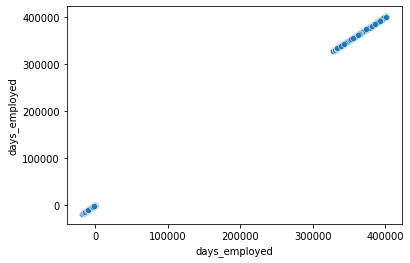

In [11]:
#создадим диаграмму рассеивания
import seaborn
seaborn.scatterplot(x= data['days_employed'], y = data['days_employed'])

Мы видим, что часть точек слишком отличается от других. Если мы изменим эти значения, взяв число в модуль, то данные придут в норму

In [12]:
data['days_employed'] = abs(data['days_employed'])
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Итак значения перестали быть отрицательными, но числа остались. Попробуем еще раз сделать диаграмму рассеивания

<AxesSubplot:xlabel='days_employed', ylabel='days_employed'>

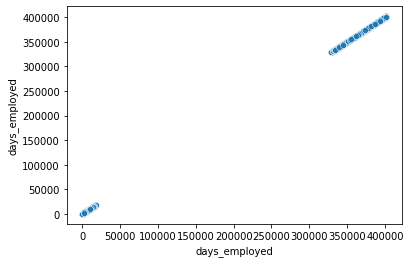

In [13]:
seaborn.scatterplot(x= data['days_employed'], y = data['days_employed'])

In [14]:
days_employed_median = data['days_employed'].median()
f'{days_employed_median:.2f}'

'2194.22'

Итак, мы видим, что числа хоть и стали положительными, но все же находятся слишком далеко от общей массы. Получается общую картину мы не нарушили, но с отсутствием отрицательных значений можно будет выполнить более точные расчеты. И, кстати, медианное число тоже изменилось. Им мы и заполним пропуски.

In [15]:
data['days_employed'] = data['days_employed'].fillna(days_employed_median)
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [16]:
#проверим пропуски еще раз и убедимся что точно отсутствуют
data[data['days_employed'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [17]:
#проверим столбец с количеством детей
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Видим отрицательное значение `-1` и огромное число `20`. Скорее всего это опечатка или неверный сбор данных. Поэтому уберем минус с помощью модуля и превратим число 20 в 2. 

In [18]:
data.loc[data['children'] == 20, 'children'] = 2
data.loc[data['children'] == -1, 'children'] = 1
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [19]:
#проверим столбец с возрастом
data['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

In [20]:
data[data['dob_years'] == 0].value_counts().sum()

101

Число 0 смущает в колонке с возрастом. Скорее всего это тоже пропуск. Данные будут искажены, если оставим все как есть. Заполним это число медианой. Из общего числа строк, 101 строчка с показателем 0 - это всего 0,47%

In [21]:
data.loc[data['dob_years'] == 0, 'dob_years'] = data['dob_years'].median()
data['dob_years'].sort_values().unique()

array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75.])

In [22]:
#проверим столбец пола
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [23]:
#столбец debt
data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

Цифра 0 - не имел проблем с возвратом кредита в срок, а 1 - были проблемы

### Шаг 2.3. Изменение типов данных.

In [24]:
#Заменим вещественный тип данных в столбце total_income на целочисленный, с помощью метода astype()
data['total_income'] = data['total_income'].astype(int)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33.0,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.4. Удаление дубликатов.

In [25]:
#посмотрим есть ли в таблице дубликаты
data.duplicated().sum()

55

Ага, 54 дубликата явных дубликата. Удалим, сохраняя новые индексы и порядок

In [26]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

In [27]:
data['education'].sort_values().unique()

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

In [28]:
data['education'] = data['education'].str.lower()

#проверим еще раз
data['education'].head()


0     высшее
1    среднее
2    среднее
3    среднее
4    среднее
Name: education, dtype: object

In [29]:
data['education'].value_counts()

среднее                15187
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Ура, победа! У нас теперь есть только 5 категорий образования. Посмотрим дальше.

In [30]:
data['income_type'].sort_values().unique()

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

In [31]:
data['purpose'].sort_values().unique()

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

А вот и новая проблема. У нас должно быть всего 4 категории: операции с автомобилем, операции с недвижимостью, проведение свадьбы и получение образования.

In [32]:
data['family_status'].sort_values().unique()

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [33]:
#созданим новый датафрейм с двумя столбцами

catalog_education = data[['education_id', 'education']]
catalog_education.head(33)

,education_id,education
0,0,высшее
1,1,среднее
2,1,среднее
3,1,среднее
4,1,среднее
5,0,высшее
6,0,высшее
7,1,среднее
8,0,высшее
9,1,среднее


Итак, можно заметить, что каждой категории образования соответсвует определенный `id` и их всего 5: от 0 до 4
* высшее - 0
* среднее - 1
* неоконченное высшее - 2
* начальное - 3
* ученая степень - 4

In [34]:
catalog_status = data[['family_status_id', 'family_status']]
catalog_status.head(33)

,family_status_id,family_status
0,0,женат / замужем
1,0,женат / замужем
2,0,женат / замужем
3,0,женат / замужем
4,1,гражданский брак
5,1,гражданский брак
6,0,женат / замужем
7,0,женат / замужем
8,1,гражданский брак
9,0,женат / замужем


Здесь распределение будет следующее:
* женат/замужем - 0
* гражданский брак - 1
* вдовец/вдова - 2
* в разводе - 3
* не женат/ не замужем - 4

In [35]:
#удалим столбцы из общей таблицы
data=data.drop(['education'], axis=1)
data=data.drop(['family_status'], axis=1)
data.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода.

На основании диапазонов, указанных ниже, создадим столбец total_income_category с категориями:

* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

Например, кредитополучателю с доходом 25000 назначим категорию 'E', а клиенту, получающему 235000, — 'B'.

In [36]:
#создаем функцию

def income_group(total_income):
    
    if total_income <= 30000:
        return 'E'
    if total_income <= 50000:
        return 'D'
    if total_income <= 200000:
        return 'C'
    if total_income <= 1000000:
        return 'B'
    return 'A'

#вызовем функцию

data['total_income_category'] = data['total_income'].apply(income_group)
data.head(10)


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
5,0,926.185831,27.0,0,1,M,компаньон,0,255763,покупка жилья,B
6,0,2879.202052,43.0,0,0,F,компаньон,0,240525,операции с жильем,B
7,0,152.779569,50.0,1,0,M,сотрудник,0,135823,образование,C
8,2,6929.865299,35.0,0,1,F,сотрудник,0,95856,на проведение свадьбы,C
9,0,2188.756445,41.0,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C


### Шаг 2.7. Категоризация целей кредита.

У нас есть столбец с целью кредита `purpose` но значений там слишком много. Поэтому создадим новый столбец  `purpose_category`, в который войдут следующие категории:
* операции с автомобилем
* операции с недвижимостью
* проведение свадьбы
* получение образования

In [37]:
#сначала посмотрим еще раз какие значения у нас встречаются
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [38]:
def purpose_group(purpose):
    if purpose == 'покупка жилья':
        return 'операции с недвижимостью'
    if purpose == 'операции с жильем':
        return 'операции с недвижимостью'
    if purpose == 'покупка жилья для семьи':
        return 'операции с недвижимостью'
    if purpose == 'покупка недвижимости':
        return 'операции с недвижимостью'
    if purpose == 'покупка коммерческой недвижимости':
        return 'операции с недвижимостью'
    if purpose == 'покупка жилой недвижимости':
        return 'операции с недвижимостью'
    if purpose == 'строительство собственной недвижимости':
        return 'операции с недвижимостью'
    if purpose == 'недвижимость':
        return 'операции с недвижимостью'
    if purpose == 'строительство недвижимости':
        return 'операции с недвижимостью'
    if purpose == 'операции с коммерческой недвижимостью':
        return 'операции с недвижимостью'
    if purpose == 'строительство жилой недвижимости':
        return 'операции с недвижимостью'
    if purpose == 'жилье':
        return 'операции с недвижимостью'
    if purpose == 'операции со своей недвижимостью':
        return 'операции с недвижимостью'
    if purpose == 'покупка своего жилья':
        return 'операции с недвижимостью'
    if purpose == 'операции с недвижимостью':
        return 'операции с недвижимостью'
    if purpose == 'покупка жилья для сдачи':
        return 'операции с недвижимостью'
    if purpose == 'ремонт жилью':
        return 'операции с недвижимостью'
    if purpose == 'сыграть свадьбу':
        return 'проведение свадьбы'
    if purpose == 'на проведение свадьбы':
        return 'проведение свадьбы'
    if purpose == 'свадьба':
        return 'проведение свадьбы'
    if purpose == 'приобретение автомобиля':
        return 'операции с автомобилем'
    if purpose == 'на покупку подержанного автомобиля':
        return 'операции с автомобилем'
    if purpose == 'на покупку своего автомобиля':
        return 'операции с автомобилем'
    if purpose == 'автомобили':
        return 'операции с автомобилем'
    if purpose == 'сделка с подержанным автомобилем':
        return 'операции с автомобилем'
    if purpose == 'автомобиль':
        return 'операции с автомобилем'
    if purpose == 'свой автомобиль':
        return 'операции с автомобилем'
    if purpose == 'сделка с автомобилем':
        return 'операции с автомобилем'
    if purpose == 'на покупку автомобиля':
        return 'операции с автомобилем'
    return 'получение образования'



#вызовем функцию
data['purpose_category'] = data['purpose'].apply(purpose_group)
data.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27.0,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43.0,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50.0,1,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35.0,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41.0,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Ответы на вопросы.

##### Вопрос 1:  **Есть ли зависимость между количеством детей и возвратом кредита в срок?**


 
 Чтобы ответить на этот вопрос, сравним показатели. Посмотрим сколько детей есть у тех, кто имел проблемы с возвратом кредитов в срок. 

array([[<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'days_employed'}>,
        <AxesSubplot:title={'center':'dob_years'}>],
       [<AxesSubplot:title={'center':'education_id'}>,
        <AxesSubplot:title={'center':'family_status_id'}>,
        <AxesSubplot:title={'center':'debt'}>],
       [<AxesSubplot:title={'center':'total_income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

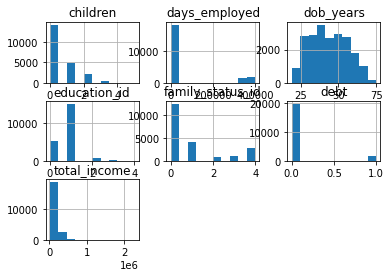

In [39]:
#посмотрим на распределение каждого атрибута путем дискретизации 
#значений в сегменты и рассмотреть частоту в каждом сегменте в виде гистограмм
data.hist()

In [40]:
#создали новую переменную, куда поместили все строчки, в которых указано, что у клиента были проблемы с возвратом кредита 
#и еще одну где будут все, кто выплачивал вовремя
data_1 = data[data['debt']==1]
data_0 = data[data['debt']==0]
data_1.head(3)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
14,0,1844.956182,56.0,0,1,F,компаньон,1,165127,покупка жилой недвижимости,C,операции с недвижимостью
32,0,4649.910832,34.0,1,1,F,сотрудник,1,139057,на проведение свадьбы,C,проведение свадьбы
38,0,597.881827,25.0,0,4,M,сотрудник,1,192247,образование,C,получение образования


<AxesSubplot:xlabel='children', ylabel='debt'>

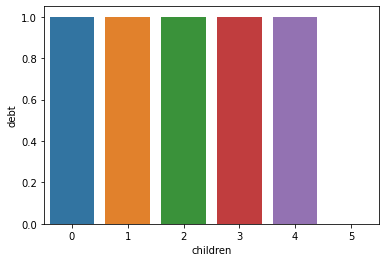

In [41]:
seaborn.barplot(x=data['children'], y=data_1['debt'])

Мы видим, что у клиентов, у которых есть проблемы с выплатами, нет более 5 детей. Но все остальные категории присутствуют 

In [42]:
data['children'] = data['children'].astype(int)
data_pivot = data.groupby(['children', 'debt']).agg({'children':sum})
data_pivot

children
children debt          
0        0            0
         1            0
1        0         4411
         1          445
2        0         3852
         1          404
3        0          909
         1           81
4        0          148
         1           16
5        0           45

<AxesSubplot:xlabel='children', ylabel='debt'>

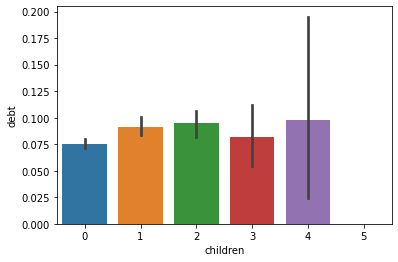

In [43]:
seaborn.barplot(x=data['children'], y=data['debt'])

Можно сделать **вывод**: количество детей никак не зависит от способности клиентов возвращать кредит в срок. На графике видно, что количетсво распредлено равномерно. Можно заметить, что у людей с 2 детьми больше вероятность попасть в группу риска, чем у кого 3 или 5. Наличие 5 детей в семье вообще положительно влияет на платежеспособность. 

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [44]:
data['family_status_id'] = data['family_status_id'].astype(int)
data_pivot_2 = data.groupby(['family_status_id', 'debt']).agg({'family_status_id':sum})
data_pivot_2

family_status_id
family_status_id debt                  
0                0                    0
                 1                    0
1                0                 3774
                 1                  388
2                0                 1792
                 1                  126
3                0                 3330
                 1                  255
4                0                10144
                 1                 1096

<AxesSubplot:xlabel='family_status_id', ylabel='debt'>

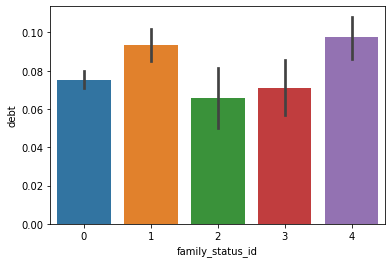

In [45]:
seaborn.barplot(x=data['family_status_id'], y=data['debt'])

Напомню распределение:

* женат/замужем - 0
* гражданский брак - 1
* вдовец/вдова - 2
* в разводе - 3
* не женат/ не замужем - 4

Можно сделать вывод, что наибольшие трудности возникают у тех, кто не женат/не замужем или находится в гражданском браке, а легче тем, кто вдовец/вдова. Но показатели не сильно разняться. Возможно зависимость тут присутствует, но не значительная.

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

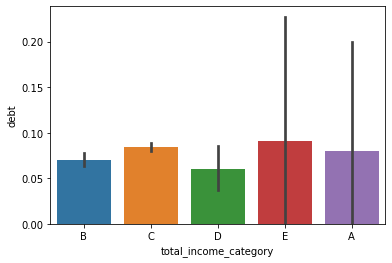

In [46]:
seaborn.barplot(x=data['total_income_category'], y=data['debt'])

Напомню определение значений:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

Заметно, что расхождения не таких значительные. У людей с доходом Е - трудностей больше, на втором месте С, меньше всего проблем у D. 
Зависимость есть, но не сильно велика. 

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

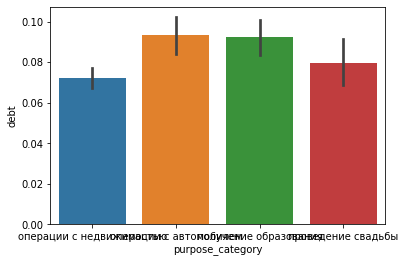

In [47]:
seaborn.barplot(x=data['purpose_category'], y=data['debt'])

Разница тоже не вилика, большая трудность с выплатой кредита в срок была у категории `операции с автомобилем`, а меньше у `операции с недвижимостью`

## Общий вывод:

Предлагаю составить примерный портрет самого злостного неплательщика:

In [48]:
#из файла. где содержатся все строки с клиентами, не возвращающими кредит в срок, посчитаем кол-во людей в каждой колонке

data_1['children'].value_counts()

0    1063
1     445
2     202
3      27
4       4
Name: children, dtype: int64

всего таких клиентов, кстати 1741. Это всего 8% от всех клиентов. Не много, но могло бы и не быть вовсе.

Итак, у большинства таких клиентов детей нет

In [49]:
data_1['family_status_id'].value_counts()

0    931
1    388
4    274
3     85
2     63
Name: family_status_id, dtype: int64

Большинство клиентов не замужем/не женаты

In [50]:
data_1['education_id'].value_counts()

1    1364
0     278
2      68
3      31
Name: education_id, dtype: int64

Основная часть таких неплательщиков со среднем образованием

In [51]:
data_1['purpose_category'].value_counts()

операции с недвижимостью    782
операции с автомобилем      403
получение образования       370
проведение свадьбы          186
Name: purpose_category, dtype: int64

Самая популярная цель кредита - Операции с недвижимостью

In [52]:
data_1['dob_years'].value_counts().head()

31.0    76
29.0    65
38.0    64
34.0    64
28.0    57
Name: dob_years, dtype: int64

В основном это люди от 28 до 38 лет

In [53]:
data_1['days_employed'].value_counts().head()

2194.220567      170
394228.664310      1
386389.497407      1
1644.023901        1
779.257029         1
Name: days_employed, dtype: int64

Кстати, про стаж, прошу заметить, что у 170 человек из нашего списка трудовой стаж - это медианная величина. 

In [54]:
data_1['income_type'].value_counts()

сотрудник      1061
компаньон       376
пенсионер       216
госслужащий      86
безработный       1
в декрете         1
Name: income_type, dtype: int64

Основная масса людей работают наемными сотрудниками

In [55]:
data_1['total_income_category'].value_counts()

C    1360
B     356
D      21
A       2
E       2
Name: total_income_category, dtype: int64

У многих доход в месяц от 50 до 200 тыс.руб.

In [56]:
data_1['gender'].value_counts()

F    994
M    747
Name: gender, dtype: int64

Здесь почти поровну, то девушек больше. 

Подводим итог: итак портрет клиента, который часто сталкивается с проблемой вовремя возвращать кредит. Это люди от 28 до 38 лет со среднем образованием, не состоящие в браке, не имеющие детей. Цель кредита - операции с недвижимостью. Работают наемными сотрудника с ежемесячным доходом от 50 до 200 тысяч рублей. 

Говоря о зависимости между четырьми показателями: количество детей, семейное положение, уровень дохода и цель кредита, можно заметить, что так или иначе зависимость есть. Она не сильно большая, но присутствует. Мы сравнивали две категории клиентов: кто не имеет проблем с возвратом в срок и кто имеет.

* У людей с 2 детьми больше вероятность попасть в группу риска, чем у кого 3 или 5. Наличие 5 детей в семье вообще положительно влияет на платежеспособность.
* Наибольшие трудности возникают у тех, кто не женат/не замужем или находится в гражданском браке, а легче тем, кто вдовец/вдова. 
* У людей с доходом до 30 тысяч - трудностей больше, на втором месте - доход от 50 до 200 тысяч, меньше всего проблем у людей с доходом от 30 до 50 тысяч. 
* Большая трудность с выплатой кредита в срок была у категории операции с автомобилем, а меньше у операции с недвижимостью.

Ради интереса хочется составить портрет клиента, которые вовремя возвращает кредит.

In [57]:
#для этого мы создавали табличку только с теми, у кого debt = 0
data_0['gender'].value_counts()

F      13194
M       6534
XNA        1
Name: gender, dtype: int64

In [58]:
data_0['children'].value_counts()

0    13043
1     4411
2     1926
3      303
4       37
5        9
Name: children, dtype: int64

In [59]:
data_0['days_employed'].value_counts().head()

2194.220567      1950
142.276217          1
8615.745089         1
248.663542          1
329951.594147       1
Name: days_employed, dtype: int64

In [60]:
data_0['education_id'].value_counts()

1    13823
0     4973
2      676
3      251
4        6
Name: education_id, dtype: int64

In [61]:
data_0['family_status_id'].value_counts()

0    11413
1     3774
4     2536
3     1110
2      896
Name: family_status_id, dtype: int64

In [62]:
data_0['income_type'].value_counts()

сотрудник          10029
компаньон           4704
пенсионер           3621
госслужащий         1371
предприниматель        2
студент                1
безработный            1
Name: income_type, dtype: int64

In [63]:
data_0['total_income_category'].value_counts()

C    14672
B     4685
D      329
A       23
E       20
Name: total_income_category, dtype: int64

In [64]:
data_0['purpose_category'].value_counts()

операции с недвижимостью    10032
операции с автомобилем       3905
получение образования        3644
проведение свадьбы           2148
Name: purpose_category, dtype: int64

In [65]:
data_0['dob_years'].value_counts().head(10)

42.0    646
35.0    569
40.0    559
41.0    557
34.0    537
38.0    533
39.0    528
33.0    525
36.0    511
44.0    504
Name: dob_years, dtype: int64

Итак это люди от 33 до 44 лет, тоже со средним образованием, не состоящие в браке, наемные сотрудники с доходом от 50 до 200 тысяч рублей, использующие кредит для операций с недвижимостью, не имеющие детей и в основном девушки. 

Существует закономерность, что портреты очень схожи. Безусловно зависимость жизненных факторов существует, но это не сильно влияет на обстоятельства, по которым клиент не возвращает кредит в срок. Поэтому нельзя запретить выдавать кредиты людям без детей или с небольшим доходом, например. 